In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Module 6.1.4: Create a set of random latitude and longitude combinations. When we run this the output will be a zip object in memory
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# 6.1.5: use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [5]:
# 6.1.5: Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

lufilufi ws
sept-iles ca
barrow us
vilhena br
vaini to
labuhan id
honiara sb
nguiu au
luderitz na
ribeira grande pt
jardim br
praia cv
mataura pf
faanui pf
severo-kurilsk ru
albany au
laguna br
souillac mu
mys shmidta ru
constitucion mx
ushuaia ar
chuy uy
jamestown sh
hithadhoo mv
barrow us
ardakan ir
puerto colombia co
rikitea pf
san pedro bz
san francisco ar
placido de castro br
atuona pf
lasa cn
tasiilaq gl
qaanaaq gl
hilo us
palora ec
margate za
rikitea pf
busselton au
labuhan id
qaanaaq gl
bredasdorp za
kruisfontein za
fajardo us
inuvik ca
hermanus za
troitskoye ru
hasaki jp
palabuhanratu id
miramar mx
atuona pf
saint-philippe re
takahagi jp
katsuura jp
del rio us
flinders au
ushuaia ar
qaanaaq gl
barrow us
esperance au
albany au
pop uz
punta arenas cl
nakusp ca
bulgan mn
conde br
sao filipe cv
castro cl
gat ly
sentyabrskiy ru
kapit my
kalangala ug
busselton au
porto santo pt
makakilo city us
vila velha br
cidreira br
rikitea pf
rikitea pf
nanortalik gl
anadyr ru
kodiak us
ribeira

hobyo so
yellowknife ca
yellowknife ca
vaini to
port alfred za
cayenne gf
busselton au
kodiak us
ponta do sol cv
vung tau vn
vaitupu wf
riyadh sa
albany au
cape town za
broken hill au
bluff nz
puerto ayora ec
chernyshevskiy ru
aklavik ca
coquimbo cl
albany au
roebourne au
mirabad af
albany au
lorengau pg
punta arenas cl
geresk af
constitucion cl
port lincoln au
barrow us
upernavik gl
albany au
geraldton au
waipawa nz
castro cl
castro cl
provideniya ru
taolanaro mg
toliary mg
chuy uy
kalianget id
kavieng pg
vardo no
hobart au
arraial do cabo br
nizhneyansk ru
mar del plata ar
pantai remis my
ushuaia ar
koumac nc
taltal cl
butaritari ki
ushuaia ar
busselton au
khorixas na
kyabram au
oussouye sn
leiva co
hasaki jp
albany au
mataura pf
longyearbyen sj
taolanaro mg
esperance au
puerto ayora ec
hobart au
dingle ie
rikitea pf
blagoyevo ru
ushuaia ar
rawson ar
iskateley ru
nikolskoye ru
thompson ca
albany au
hambantota lk
albany au
requena pe
medicine hat ca
guiglo ci
togitsu jp
malwan in
port

In [6]:
# 6.1.5: Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# 6.2.6: import the datetime module from the datetime library
from datetime import datetime

In [9]:
# 6.2.2 Add url definition
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c460fb85c2abaee3a826256f12c4827b


In [10]:
# 6.2.6: 
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
    # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lufilufi
Processing Record 2 of Set 1 | sept-iles
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | vilhena
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | labuhan
Processing Record 7 of Set 1 | honiara
Processing Record 8 of Set 1 | nguiu
City not found. Skipping...
Processing Record 9 of Set 1 | luderitz
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | jardim
Processing Record 12 of Set 1 | praia
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | faanui
Processing Record 15 of Set 1 | severo-kurilsk
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | laguna
Processing Record 18 of Set 1 | souillac
Processing Record 19 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 20 of Set 1 | constitucion
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | chuy

Processing Record 38 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 39 of Set 4 | roald
Processing Record 40 of Set 4 | kavieng
Processing Record 41 of Set 4 | kirakira
Processing Record 42 of Set 4 | avarua
Processing Record 43 of Set 4 | bambous virieux
Processing Record 44 of Set 4 | thompson
Processing Record 45 of Set 4 | mugur-aksy
Processing Record 46 of Set 4 | butaritari
Processing Record 47 of Set 4 | alta floresta
Processing Record 48 of Set 4 | ilulissat
Processing Record 49 of Set 4 | tomatlan
Processing Record 50 of Set 4 | urbana
Processing Record 1 of Set 5 | mwense
Processing Record 2 of Set 5 | cockeysville
Processing Record 3 of Set 5 | sola
Processing Record 4 of Set 5 | strezhevoy
Processing Record 5 of Set 5 | mnogovershinnyy
Processing Record 6 of Set 5 | pinega
Processing Record 7 of Set 5 | husavik
Processing Record 8 of Set 5 | farmington
Processing Record 9 of Set 5 | malwan
City not found. Skipping...
Processing Record 10 of Set 5 | s

Processing Record 29 of Set 8 | port-gentil
Processing Record 30 of Set 8 | panjab
Processing Record 31 of Set 8 | skagastrond
City not found. Skipping...
Processing Record 32 of Set 8 | norman wells
Processing Record 33 of Set 8 | san juan de los morros
Processing Record 34 of Set 8 | korla
Processing Record 35 of Set 8 | samusu
City not found. Skipping...
Processing Record 36 of Set 8 | loiza
Processing Record 37 of Set 8 | swan river
Processing Record 38 of Set 8 | aktas
Processing Record 39 of Set 8 | matara
Processing Record 40 of Set 8 | evensk
Processing Record 41 of Set 8 | mandalgovi
Processing Record 42 of Set 8 | himora
City not found. Skipping...
Processing Record 43 of Set 8 | mahajanga
Processing Record 44 of Set 8 | sibolga
Processing Record 45 of Set 8 | ashland
Processing Record 46 of Set 8 | thinadhoo
Processing Record 47 of Set 8 | qaqortoq
Processing Record 48 of Set 8 | paramirim
Processing Record 49 of Set 8 | gamba
Processing Record 50 of Set 8 | plouzane
Process

Processing Record 14 of Set 12 | wageningen
Processing Record 15 of Set 12 | nizhniy tsasuchey
Processing Record 16 of Set 12 | ugoofaaru
Processing Record 17 of Set 12 | talakan
Processing Record 18 of Set 12 | asyut
Processing Record 19 of Set 12 | banjul
Processing Record 20 of Set 12 | dudinka
Processing Record 21 of Set 12 | betlitsa
Processing Record 22 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 23 of Set 12 | belmonte
Processing Record 24 of Set 12 | dong hoi
Processing Record 25 of Set 12 | gasa
Processing Record 26 of Set 12 | teruel
Processing Record 27 of Set 12 | broome
Processing Record 28 of Set 12 | douala
Processing Record 29 of Set 12 | totness
Processing Record 30 of Set 12 | churapcha
Processing Record 31 of Set 12 | mwene-ditu
Processing Record 32 of Set 12 | shizuishan
Processing Record 33 of Set 12 | touros
Processing Record 34 of Set 12 | angostura
Processing Record 35 of Set 12 | anshun
Processing Record 36 of Set 12 | dandong
Processing 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0        Lufilufi -13.8745 -171.5986     83.98        60           1   
1       Sept-Iles  50.2001  -66.3821     58.05        85          90   
2          Barrow  71.2906 -156.7887     30.22        80          90   
3         Vilhena -12.7406  -60.1458     75.42        94          75   
4           Vaini -21.2000 -175.2000     73.56        83          40   
5         Labuhan  -6.8844  112.2051     77.27        78         100   
6         Honiara  -9.4333  159.9500     81.63        80          76   
7        Luderitz -26.6481   15.1594     61.93        72          53   
8  Ribeira Grande  38.5167  -28.7000     70.20        73          20   
9          Jardim -21.4803  -56.1381     89.04        38           7   

   Wind Speed Country                 Date  
0        6.53      WS  2021-10-12 20:50:48  
1        5.75      CA  2021-10-12 20:50:33  
2       20.71      US  2021-10-12 20:50:49  
3       13.80      BR  2021-10-12 20:50:49  
4        9.22      TO  2021-10-12 20:50:50  
5        8.86      ID  2021-10-12 20:50:50  
6        1.63      SB  2021-10-12 20:50:51  
7        6.87      NA  2021-10-12 20:50:51  
8        5.75      PT  2021-10-12 20:50:52  
9        5.48      BR  2021-10-12 20:50:45

In [12]:
# reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df

City Country                 Date      Lat       Lng  Max Temp  \
0        Lufilufi      WS  2021-10-12 20:50:48 -13.8745 -171.5986     83.98   
1       Sept-Iles      CA  2021-10-12 20:50:33  50.2001  -66.3821     58.05   
2          Barrow      US  2021-10-12 20:50:49  71.2906 -156.7887     30.22   
3         Vilhena      BR  2021-10-12 20:50:49 -12.7406  -60.1458     75.42   
4           Vaini      TO  2021-10-12 20:50:50 -21.2000 -175.2000     73.56   
..            ...     ...                  ...      ...       ...       ...   
571        Shache      CN  2021-10-12 20:55:20  38.4167   77.2406     54.25   
572  Komsomolskiy      UZ  2021-10-12 20:55:21  40.4272   71.7189     45.32   
573       Lusambo      CD  2021-10-12 20:55:21  -4.9667   23.4500     69.93   
574        Shingu      JP  2021-10-12 20:55:21  33.7333  135.9833     71.49   
575     Lisakovsk      KZ  2021-10-12 20:55:22  52.5369   62.4936     46.44   

     Humidity  Cloudiness  Wind Speed  
0          60           1        6.53  
1          85          90        5.75  
2          80          90       20.71  
3          94          75       13.80  
4          83          40        9.22  
..        ...         ...         ...  
571        21          89        7.47  
572        65           0        9.22  
573        98          58        1.52  
574        92          99        4.94  
575        69         100        7.34  

[576 rows x 9 columns]

In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# 6.3.1: Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

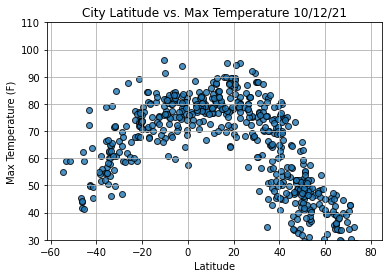

In [15]:
# 6.3.1: Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylim(30, 110)
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

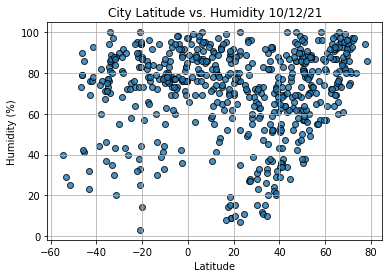

In [16]:
# 6.3.1: Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

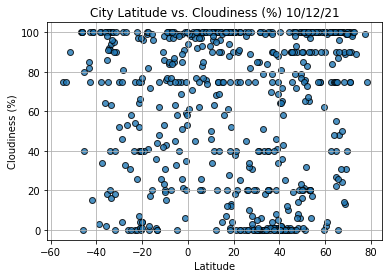

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

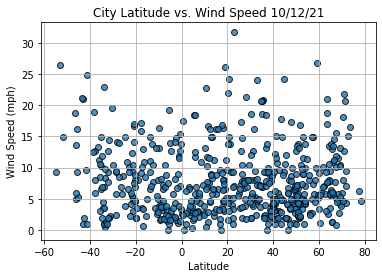

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]

In [22]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4      False
       ...  
571     True
572     True
573    False
574     True
575     True
Name: Lat, Length: 576, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

City Country                 Date      Lat       Lng  Max Temp  \
1         Sept-Iles      CA  2021-10-12 20:50:33  50.2001  -66.3821     58.05   
2            Barrow      US  2021-10-12 20:50:49  71.2906 -156.7887     30.22   
8    Ribeira Grande      PT  2021-10-12 20:50:52  38.5167  -28.7000     70.20   
10            Praia      CV  2021-10-12 20:50:52  14.9215  -23.5087     79.34   
13   Severo-Kurilsk      RU  2021-10-12 20:50:54  50.6789  156.1250     45.07   
..              ...     ...                  ...      ...       ...       ...   
570          Bousso      TD  2021-10-12 20:55:20  10.4795   16.7117     78.55   
571          Shache      CN  2021-10-12 20:55:20  38.4167   77.2406     54.25   
572    Komsomolskiy      UZ  2021-10-12 20:55:21  40.4272   71.7189     45.32   
574          Shingu      JP  2021-10-12 20:55:21  33.7333  135.9833     71.49   
575       Lisakovsk      KZ  2021-10-12 20:55:22  52.5369   62.4936     46.44   

     Humidity  Cloudiness  Wind Speed  
1          85          90        5.75  
2          80          90       20.71  
8          73          20        5.75  
10         73          75       16.11  
13         81          21       13.80  
..        ...         ...         ...  
570        59          34        6.53  
571        21          89        7.47  
572        65           0        9.22  
574        92          99        4.94  
575        69         100        7.34  

[400 rows x 9 columns]

In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

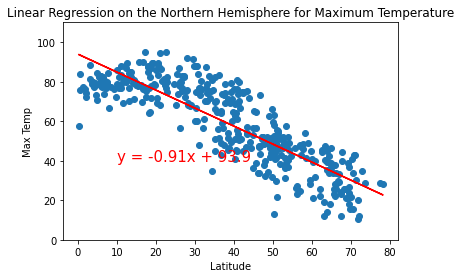

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.ylim(0, 110)

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

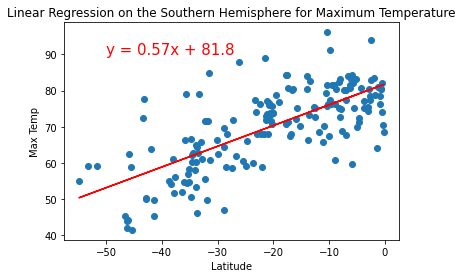

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

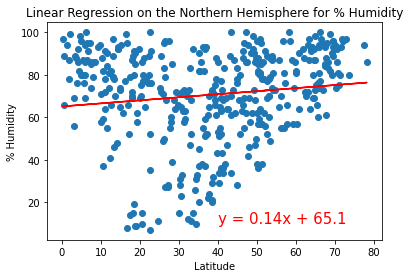

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

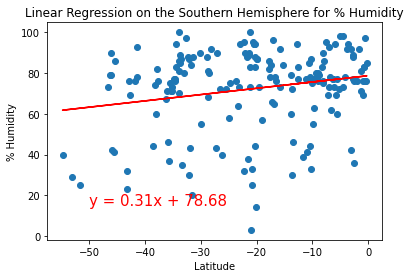

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

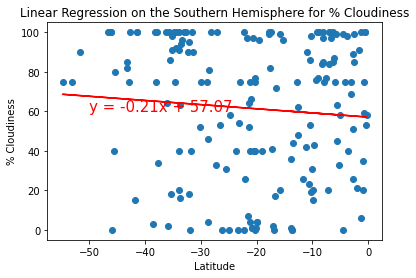

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

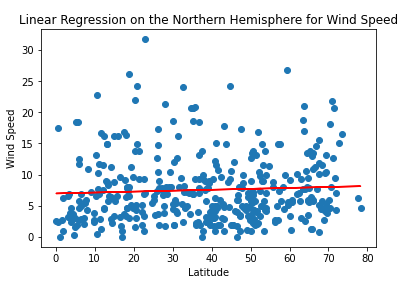

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

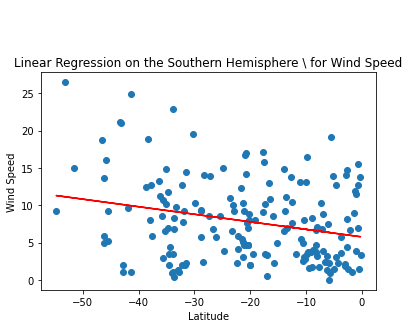

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for Wind Speed', 'Wind Speed',(-50,35))

In [32]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0        Lufilufi -13.8745 -171.5986     83.98        60           1   
1       Sept-Iles  50.2001  -66.3821     58.05        85          90   
2          Barrow  71.2906 -156.7887     30.22        80          90   
3         Vilhena -12.7406  -60.1458     75.42        94          75   
4           Vaini -21.2000 -175.2000     73.56        83          40   
5         Labuhan  -6.8844  112.2051     77.27        78         100   
6         Honiara  -9.4333  159.9500     81.63        80          76   
7        Luderitz -26.6481   15.1594     61.93        72          53   
8  Ribeira Grande  38.5167  -28.7000     70.20        73          20   
9          Jardim -21.4803  -56.1381     89.04        38           7   

   Wind Speed Country                 Date  
0        6.53      WS  2021-10-12 20:50:48  
1        5.75      CA  2021-10-12 20:50:33  
2       20.71      US  2021-10-12 20:50:49  
3       13.80      BR  2021-10-12 20:50:49  
4        9.22      TO  2021-10-12 20:50:50  
5        8.86      ID  2021-10-12 20:50:50  
6        1.63      SB  2021-10-12 20:50:51  
7        6.87      NA  2021-10-12 20:50:51  
8        5.75      PT  2021-10-12 20:50:52  
9        5.48      BR  2021-10-12 20:50:45

In [33]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [34]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

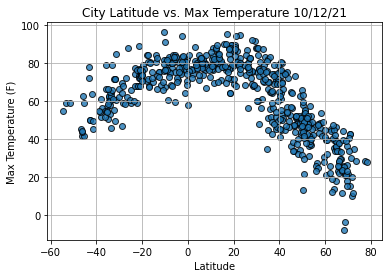

In [35]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

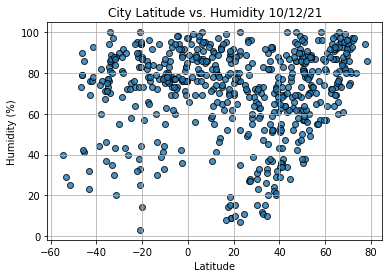

In [36]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

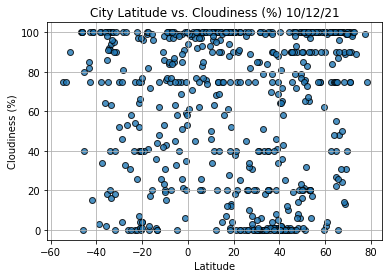

In [37]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

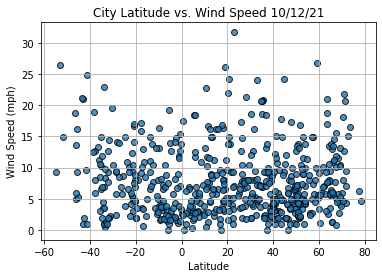

In [38]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [39]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [40]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [41]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [42]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

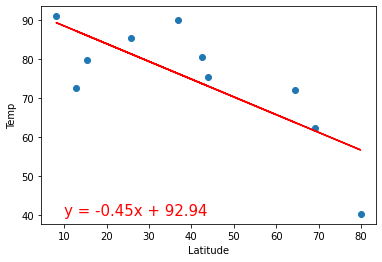

In [43]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [44]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

# Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [45]:
# create a new dataframe from acurrent dataframe, use the loc method
index13 = city_data_df.loc[13] 
index13

City               Severo-Kurilsk
Lat                       50.6789
Lng                       156.125
Max Temp                    45.07
Humidity                       81
Cloudiness                     21
Wind Speed                   13.8
Country                        RU
Date          2021-10-12 20:50:54
Name: 13, dtype: object

In [46]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4      False
       ...  
571     True
572     True
573    False
574     True
575     True
Name: Lat, Length: 576, dtype: bool

In [47]:
# for latitudes greater than or equal to 0
city_data_df.loc[(city_data_df["Lat"] >= 0)]

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
1         Sept-Iles  50.2001  -66.3821     58.05        85          90   
2            Barrow  71.2906 -156.7887     30.22        80          90   
8    Ribeira Grande  38.5167  -28.7000     70.20        73          20   
10            Praia  14.9215  -23.5087     79.34        73          75   
13   Severo-Kurilsk  50.6789  156.1250     45.07        81          21   
..              ...      ...       ...       ...       ...         ...   
570          Bousso  10.4795   16.7117     78.55        59          34   
571          Shache  38.4167   77.2406     54.25        21          89   
572    Komsomolskiy  40.4272   71.7189     45.32        65           0   
574          Shingu  33.7333  135.9833     71.49        92          99   
575       Lisakovsk  52.5369   62.4936     46.44        69         100   

     Wind Speed Country                 Date  
1          5.75      CA  2021-10-12 20:50:33  
2         20.71      US  2021-10-12 20:50:49  
8          5.75      PT  2021-10-12 20:50:52  
10        16.11      CV  2021-10-12 20:50:52  
13        13.80      RU  2021-10-12 20:50:54  
..          ...     ...                  ...  
570        6.53      TD  2021-10-12 20:55:20  
571        7.47      CN  2021-10-12 20:55:20  
572        9.22      UZ  2021-10-12 20:55:21  
574        4.94      JP  2021-10-12 20:55:21  
575        7.34      KZ  2021-10-12 20:55:22  

[400 rows x 9 columns]

In [48]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

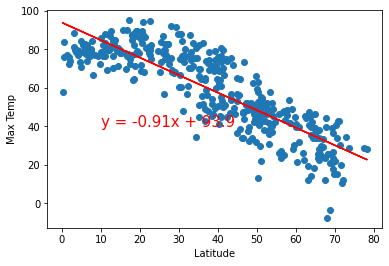

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp',(10,40))

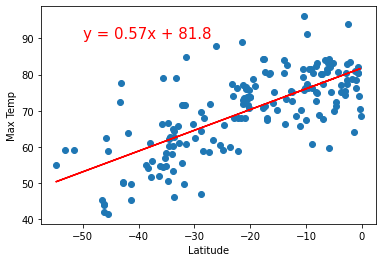

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \ for Maximum Temperature', 'Max Temp',(-50,90))

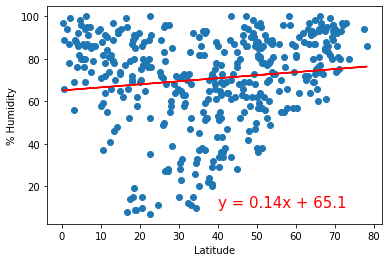

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \ for % Humidity', '% Humidity',(40,10))

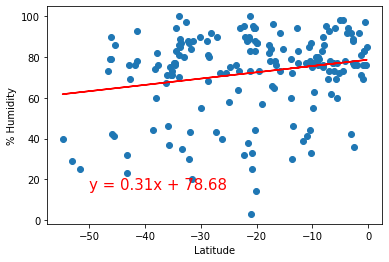

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \ for % Humidity', '% Humidity',(-50,15))

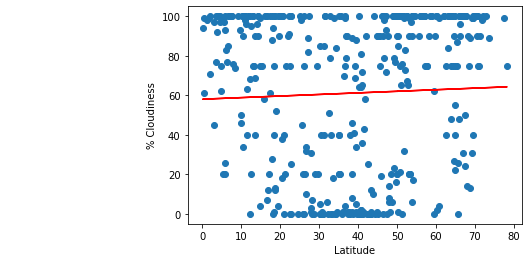

In [53]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Nouthern Hemisphere \ for % Cloudiness', '% Cloudiness',(-50,60))

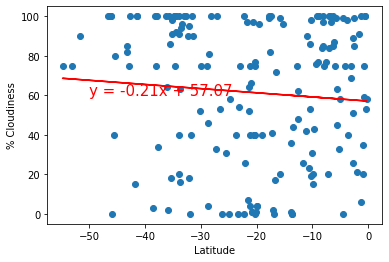

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \ for % Cloudiness', '% Cloudiness',(-50,60))

In [55]:
pip install python-gmaps

Note: you may need to restart the kernel to use updated packages.
